# Machine Learning in Python - Predictive Modelling

### Lots of Imports

To build predictive models in Python we use a set of libraries that are imported here. In particular **pandas** and **sklearn** are particularly important.

In [1]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io
from operator import itemgetter

from TAS_Python_Utilities import data_viz
from TAS_Python_Utilities import data_viz_target
from TAS_Python_Utilities import visualize_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors

from xgboost import XGBClassifier

%matplotlib inline
%qtconsole

### Load & Partition Data

In [2]:
dataset = pd.read_csv('ACMETelephoneABT.csv')
dataset.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,True,6,1,1812,False,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,False
1,1000012,36,NaN,NaN,yes,True,9,4,544,True,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,False
2,1000034,74,professional,town,yes,False,7,2,138,True,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,False
3,1000063,30,NaN,suburban,no,False,6,3,122,True,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,False
4,1000085,32,NaN,town,yes,False,7,8,10,True,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,False


Examine the distribution of the two classes

In [3]:
dataset["churn"].value_counts()

True     5000
False    5000
Name: churn, dtype: int64

In [4]:
display(dataset.select_dtypes(include=[np.number]).describe())
display(dataset.select_dtypes(include=[np.object]).describe())

,customer,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.049974e+06,30.318400,4.293600,1.804500,390.171700,35.730696,58.927600,521.170645,46.236537,42.392670,...,25.208834,8.368029,2.217785,-0.046749,9.992283,18.836300,1.737414,0.044600,0.020700,0.195000
std,2.879841e+04,22.158676,3.139902,1.345088,257.076656,57.072922,43.889815,540.435285,23.964960,106.374374,...,35.665714,17.676847,3.882714,9.973846,14.859162,9.610928,5.754564,0.225867,0.155158,0.641261
min,1.000001e+06,0.000000,0.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-41.322736,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025200e+06,0.000000,0.000000,1.000000,210.000000,0.000000,33.327500,150.627500,30.000000,0.000000,...,3.000000,0.000000,0.779357,-6.791049,1.670000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,1.049833e+06,34.000000,5.000000,1.000000,339.000000,0.000000,49.205000,359.625000,44.990000,3.000000,...,13.330000,2.000000,1.399874,0.011607,5.330000,17.000000,0.000000,0.000000,0.000000,0.000000
75%,1.074990e+06,48.000000,7.000000,2.000000,525.000000,59.990000,71.762500,709.187500,59.990000,43.750000,...,33.330000,9.000000,2.494232,6.494723,12.670000,24.000000,1.330000,0.000000,0.000000,0.000000
max,1.099988e+06,98.000000,9.000000,21.000000,1812.000000,499.990000,584.230000,6336.250000,337.980000,4320.750000,...,610.330000,304.000000,160.000000,37.779743,304.670000,61.000000,365.670000,4.000000,4.000000,3.000000


,occupation,regionType,marriageStatus,creditRating,creditCard
count,2600,5224,10000,10000,10000
unique,7,7,3,7,6
top,professional,suburban,unknown,B,true
freq,1705,3085,3920,3785,6537


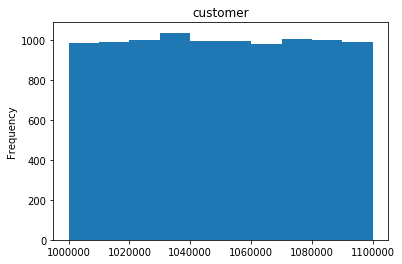

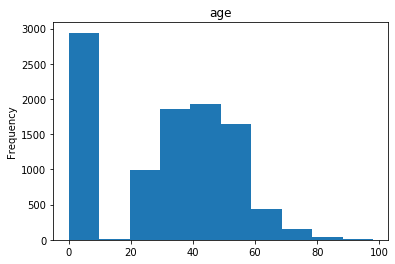

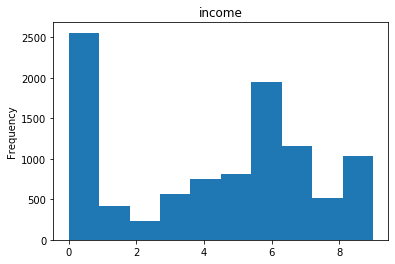

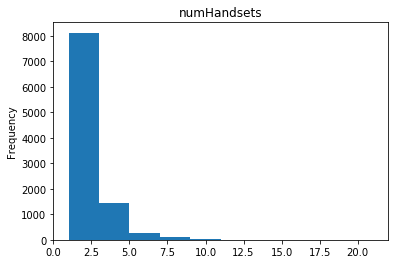

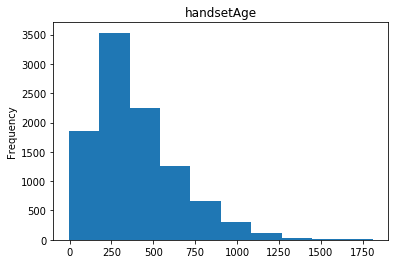

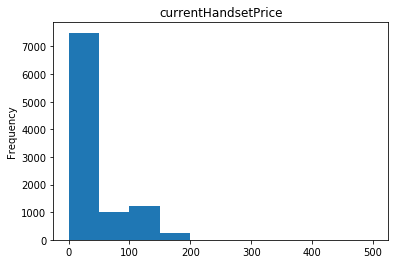

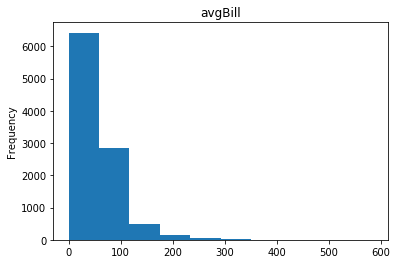

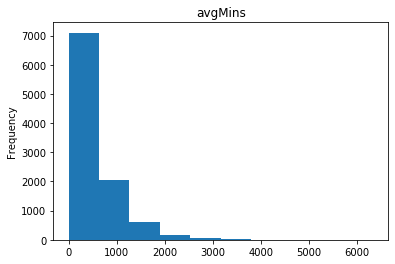

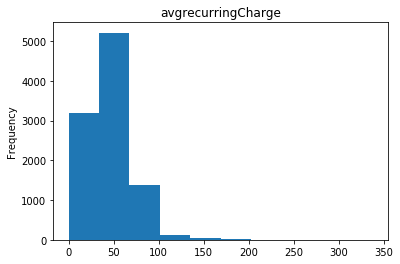

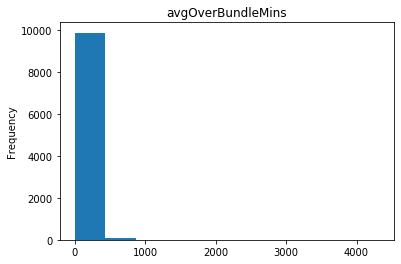

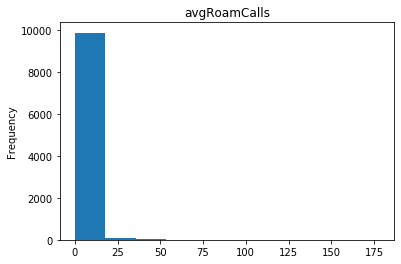

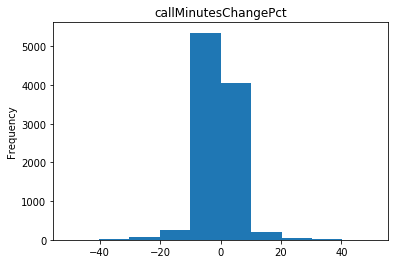

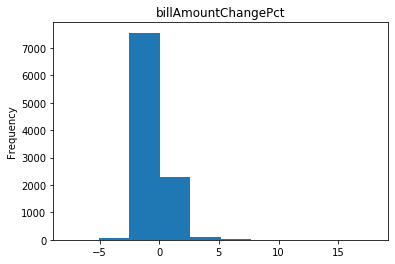

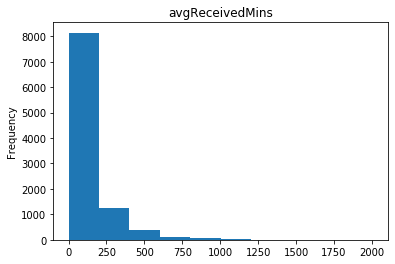

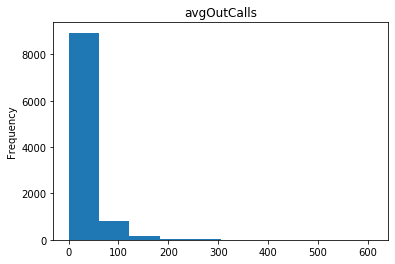

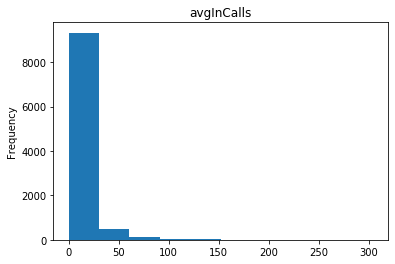

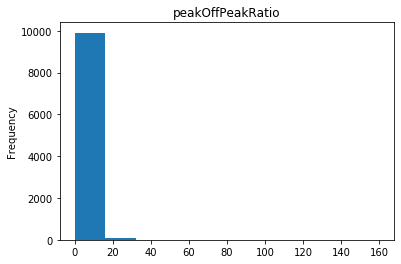

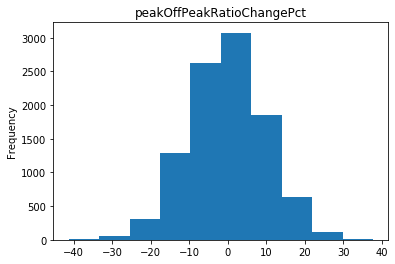

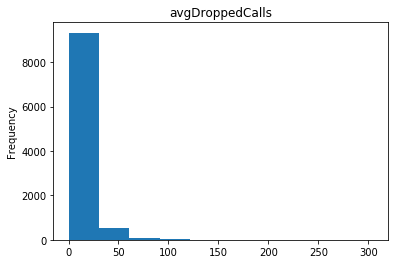

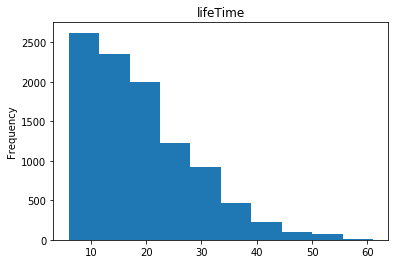

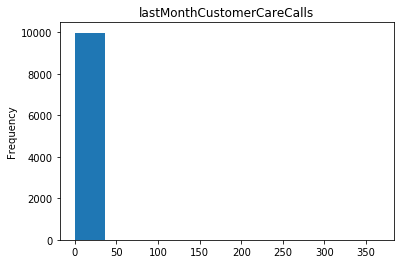

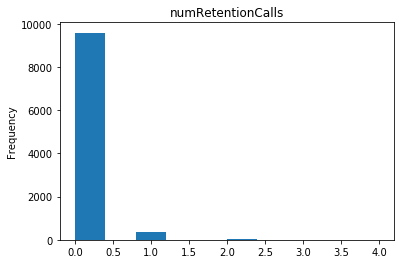

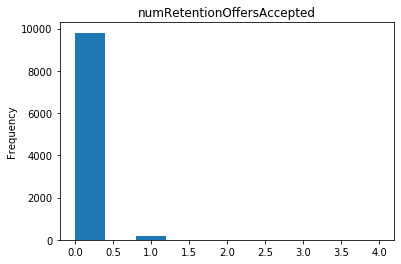

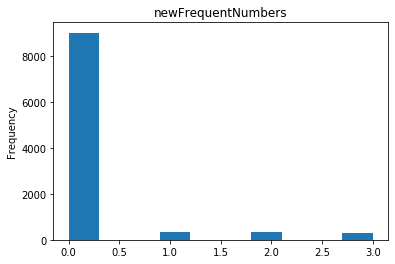

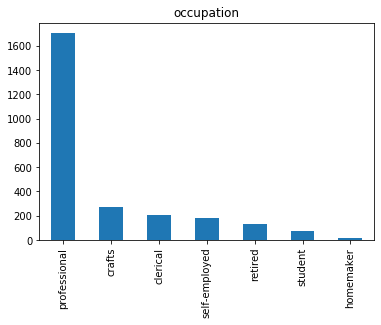

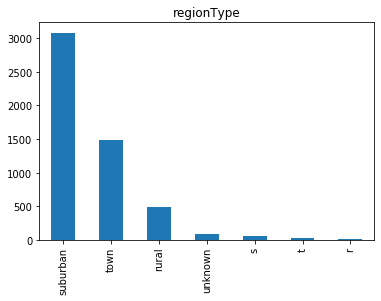

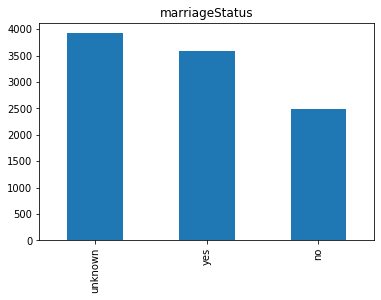

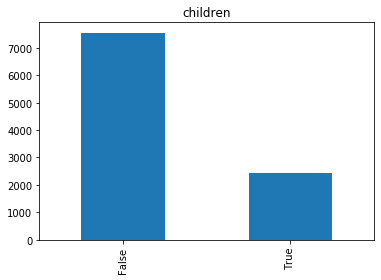

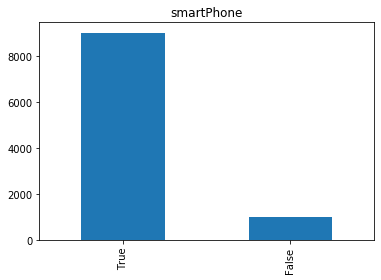

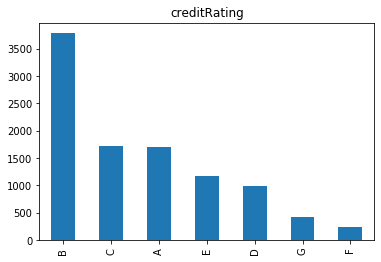

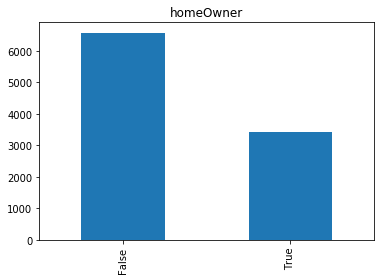

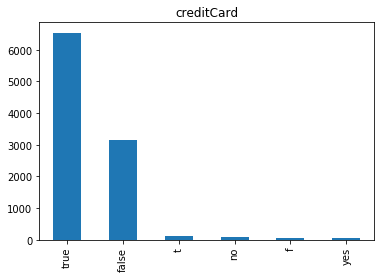

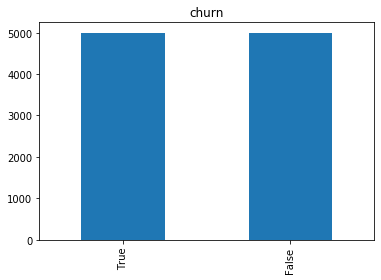

In [5]:
data_viz(dataset)

customer


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:256: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(group.dropna().values, bins=bins, **kwargs)


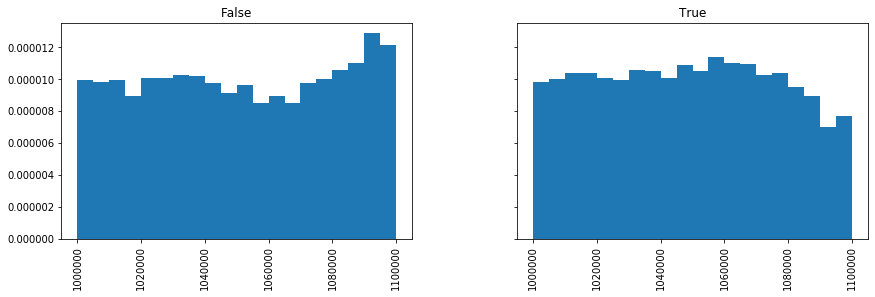

age


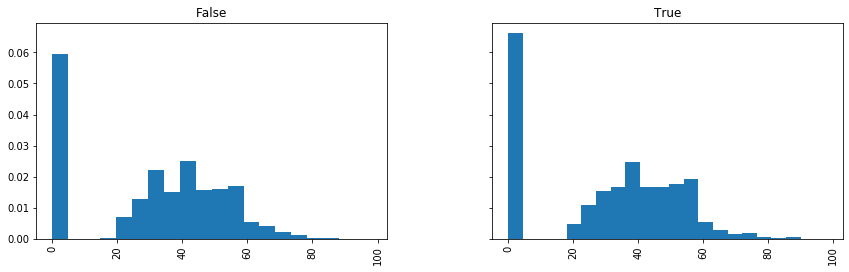

income


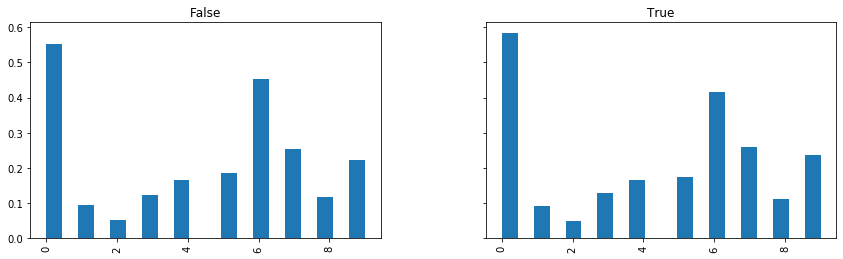

numHandsets


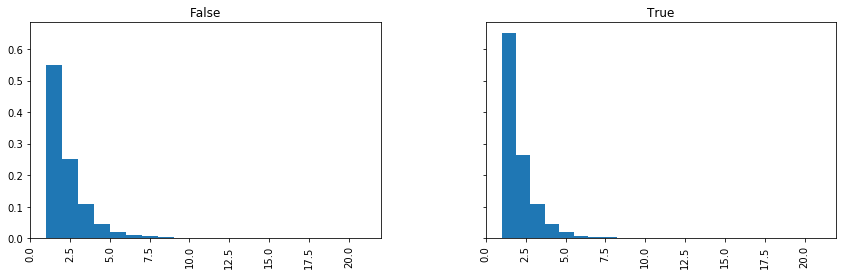

handsetAge


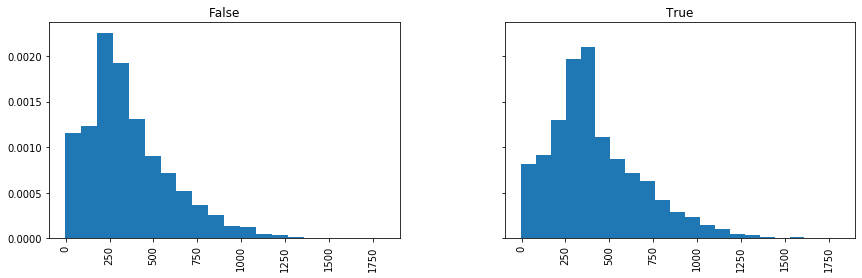

currentHandsetPrice


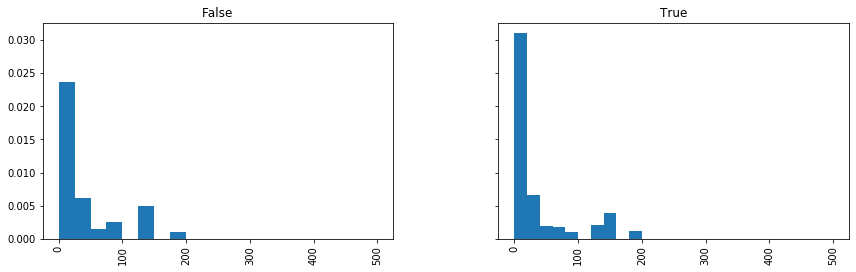

avgBill


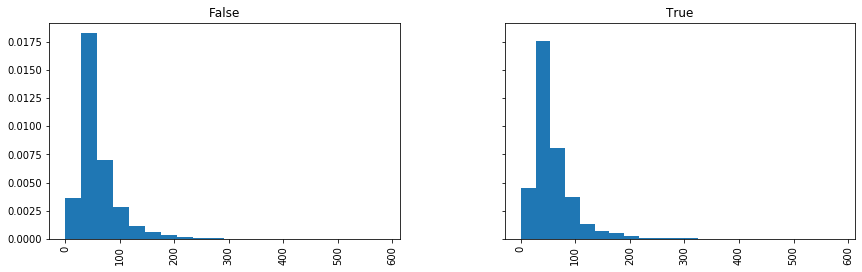

avgMins


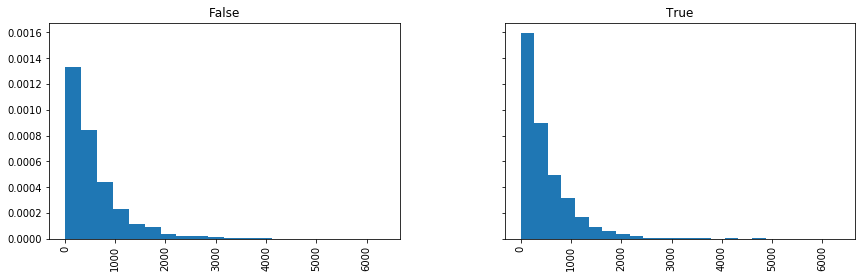

avgrecurringCharge


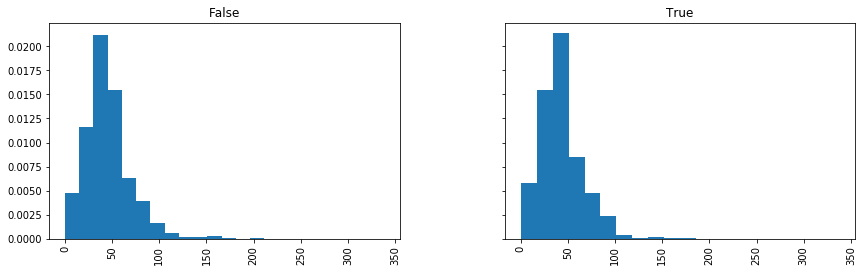

avgOverBundleMins


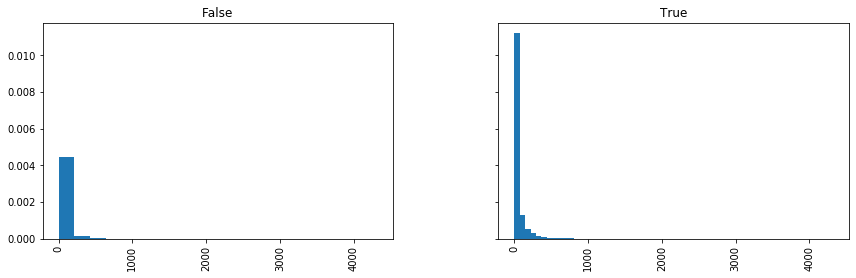

avgRoamCalls


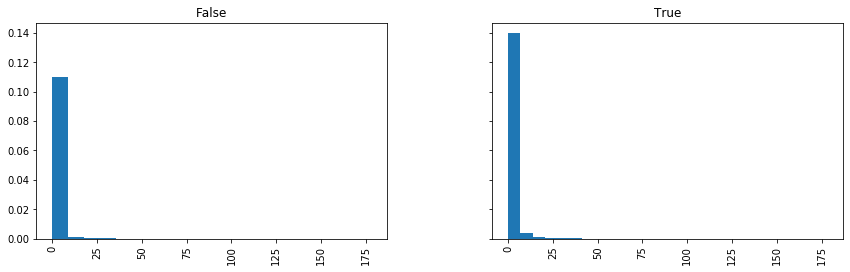

callMinutesChangePct


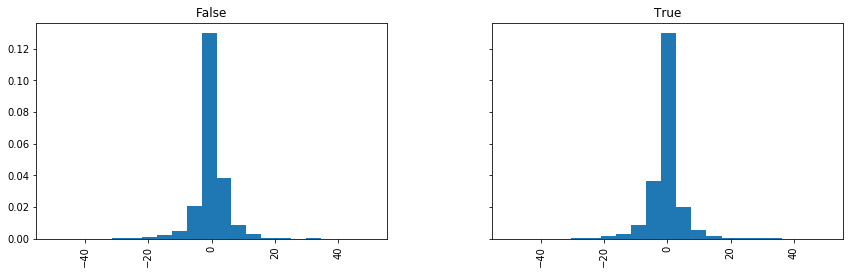

billAmountChangePct


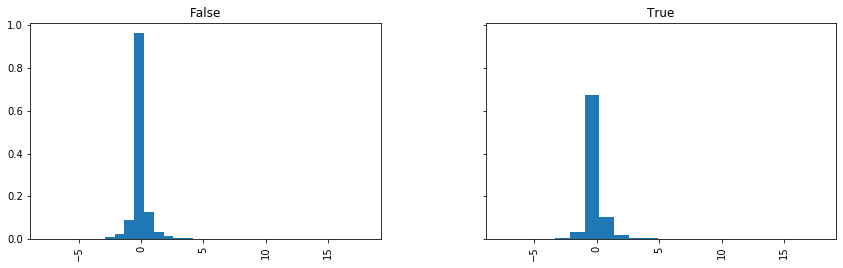

avgReceivedMins


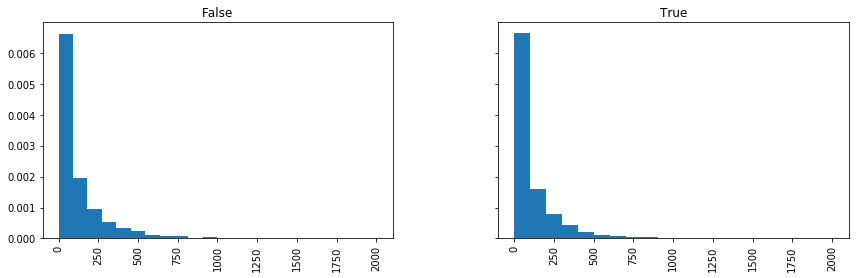

avgOutCalls


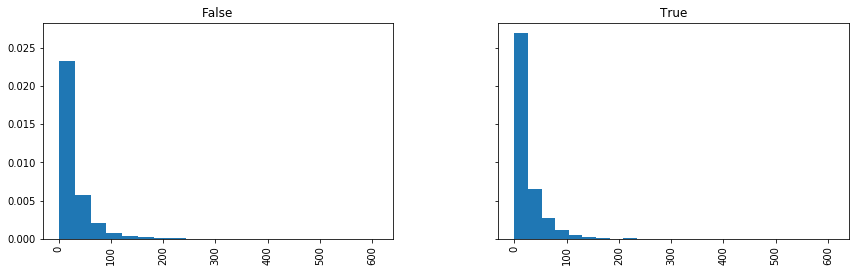

avgInCalls


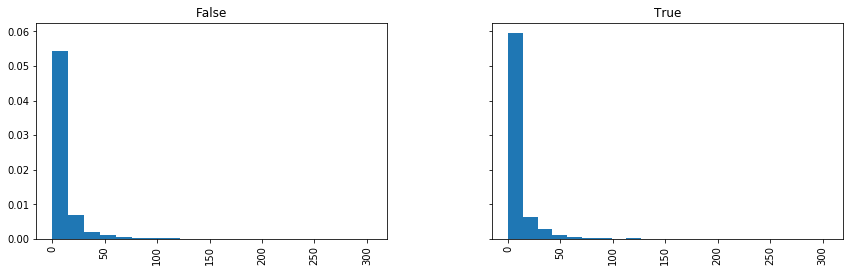

peakOffPeakRatio


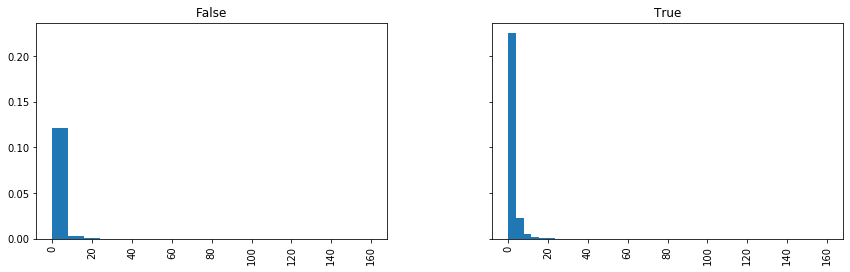

peakOffPeakRatioChangePct


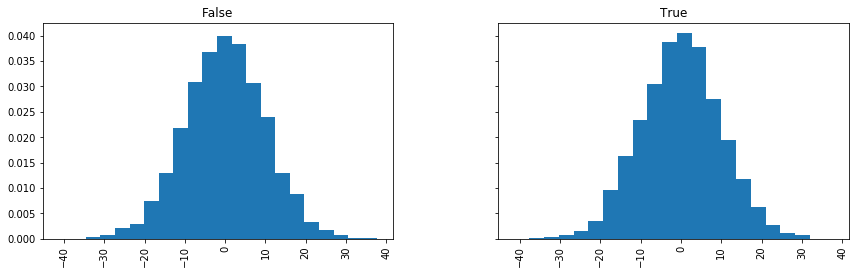

avgDroppedCalls


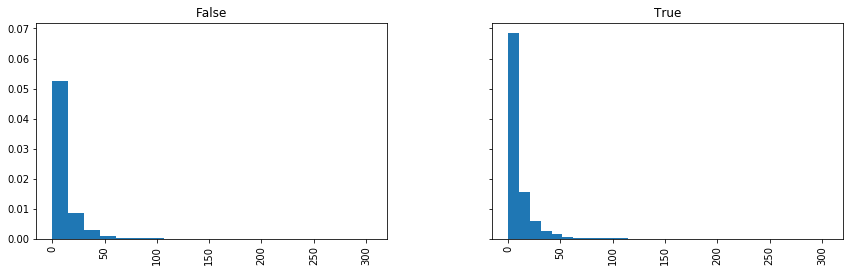

lifeTime


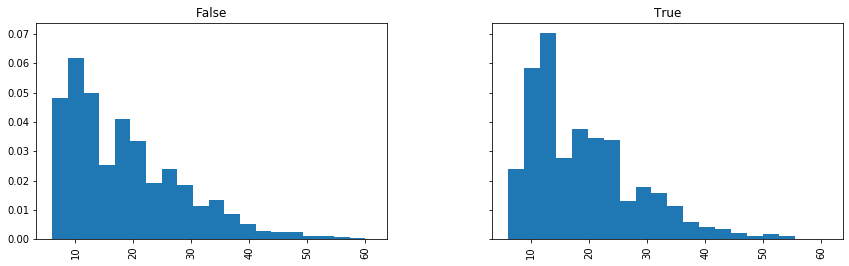

lastMonthCustomerCareCalls


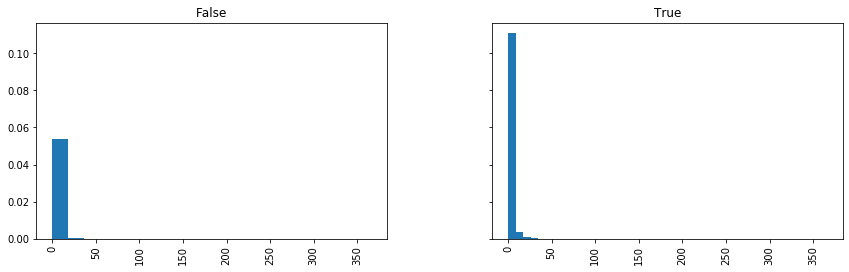

numRetentionCalls


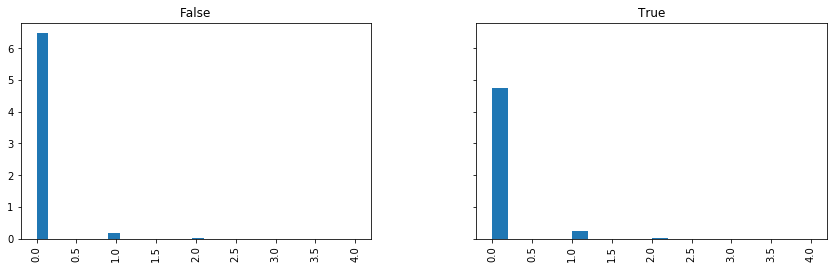

numRetentionOffersAccepted


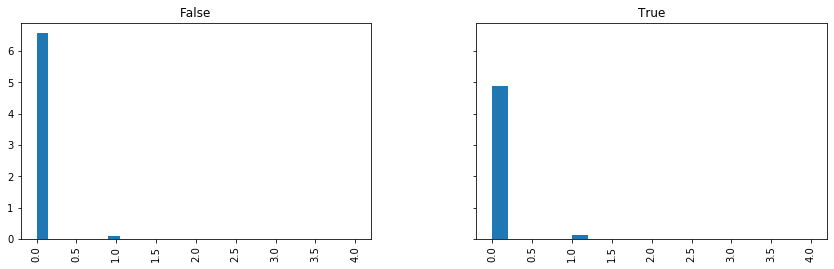

newFrequentNumbers


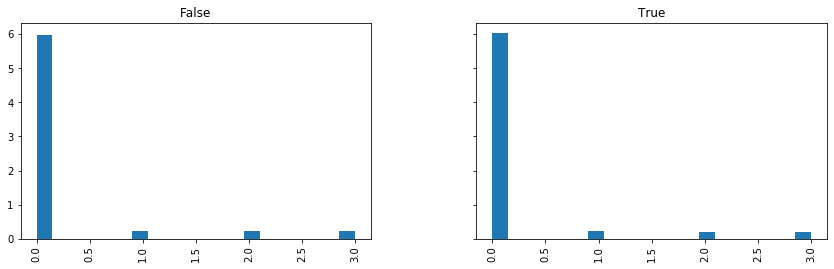

occupation


/Users/johnnylee/Desktop/CS-Master/Advanced Machine Learning/Task_01 MNIST/1 Machine Learning in Python - Predictive Modelling.ipynb/TAS_Python_Utilities.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, num_target_levels,idx + 1)


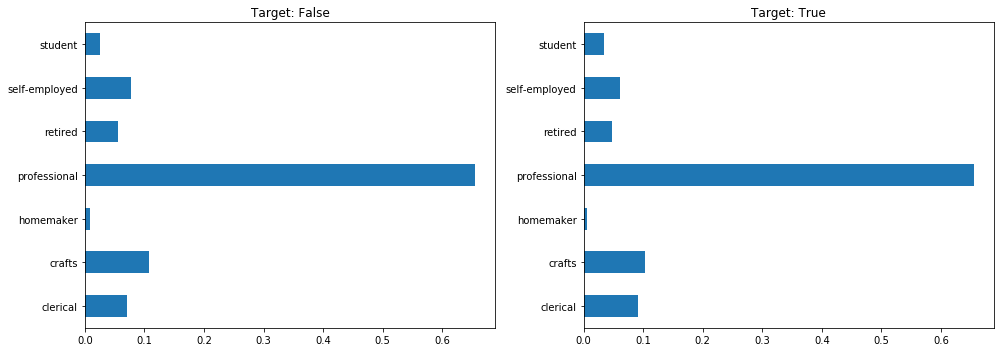

regionType


/Users/johnnylee/Desktop/CS-Master/Advanced Machine Learning/Task_01 MNIST/1 Machine Learning in Python - Predictive Modelling.ipynb/TAS_Python_Utilities.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, num_target_levels,idx + 1)


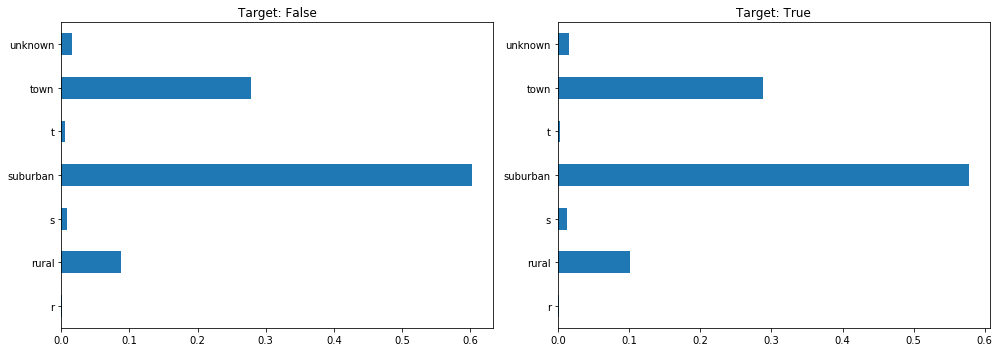

marriageStatus


/Users/johnnylee/Desktop/CS-Master/Advanced Machine Learning/Task_01 MNIST/1 Machine Learning in Python - Predictive Modelling.ipynb/TAS_Python_Utilities.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, num_target_levels,idx + 1)


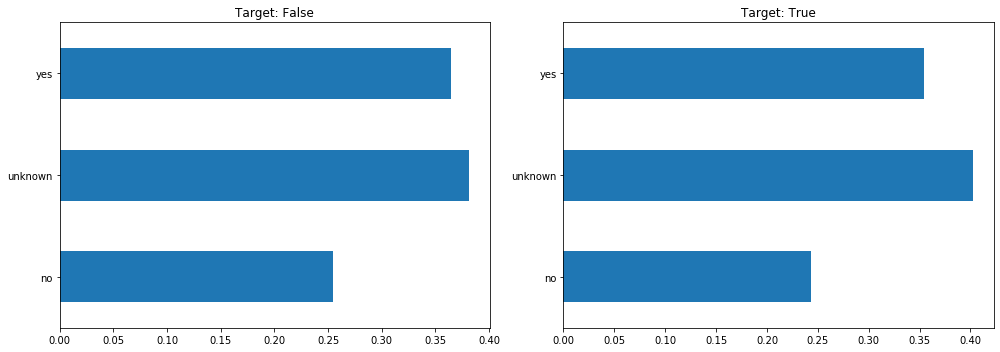

creditRating


/Users/johnnylee/Desktop/CS-Master/Advanced Machine Learning/Task_01 MNIST/1 Machine Learning in Python - Predictive Modelling.ipynb/TAS_Python_Utilities.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, num_target_levels,idx + 1)


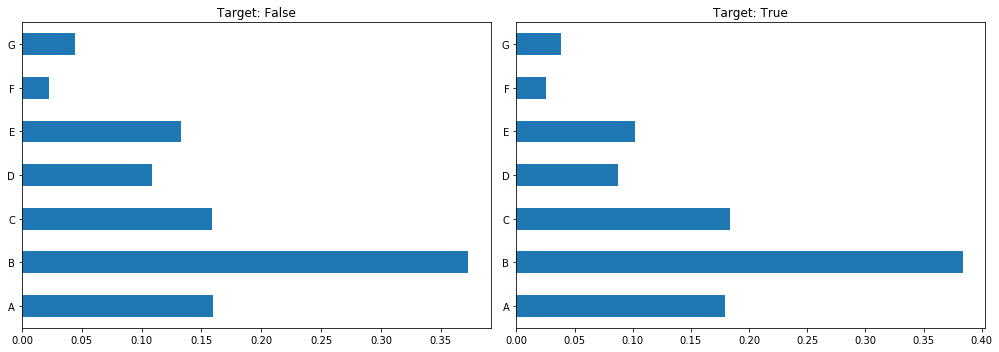

creditCard


/Users/johnnylee/Desktop/CS-Master/Advanced Machine Learning/Task_01 MNIST/1 Machine Learning in Python - Predictive Modelling.ipynb/TAS_Python_Utilities.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, num_target_levels,idx + 1)


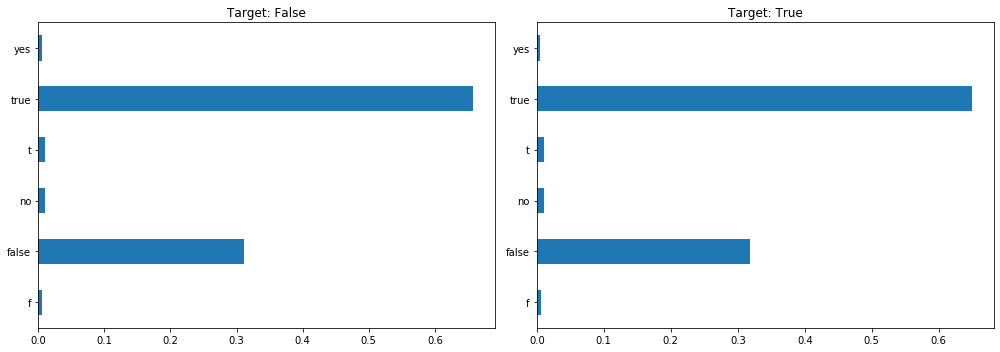

In [6]:
data_viz_target(dataset, "churn")

Isolate the descriptive features we are interested in

In [7]:
X = dataset[['age',
 'income',
 'numHandsets',  
 'handsetAge',
 'smartPhone',
 'currentHandsetPrice',
 'avgBill',
 'avgOverBundleMins',
 'avgRoamCalls',
 'callMinutesChangePct',
 'billAmountChangePct',
 'avgReceivedMins',
 'avgOutCalls',
 'avgInCalls',
 'peakOffPeakRatio',
 'peakOffPeakRatioChangePct',
 'avgDroppedCalls',
 'lifeTime',
 'newFrequentNumbers']]
Y = dataset["churn"]

Split the data into a **training set**, a **vaidation set**, and a **test set**

In [8]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

### A Very Simple Decision Tree

Train a decision tree

In [9]:
my_tree = \
    tree.DecisionTreeClassifier(criterion="entropy")
my_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Visualise the decision tree so we can see what it is doing!

In [10]:
feature_names = list(X_train.columns)
visualize_tree(my_tree, feature_names, fileName='dt_over.png')
Image(filename='dt_over.png') 

NameError: name 'exit' is not defined

### Evaluating Model Performance

Assess the performance of the decision tree on the training set

In [ ]:
# Make a set of predictions for the training data
y_pred = my_tree.predict(X_train)

# Print performance details
accuracy = \
metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))

print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_train, y_pred))

# Print nicer homemade confusion matrix
print("Confusion Matrix")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Assess the performance of the tree on the validation dataset

In [ ]:
# Make a set of predictions for the test data
y_pred = my_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_valid, y_pred))

# Print nicer confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Generate probability score based ROC evaluation metrics

In [ ]:
# Make a set of predictions for the validation data
y_pred_score = my_tree.predict_proba(X_valid)
y_pred = my_tree.predict(X_valid)
print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

### Alternative Trees

Train a decision tree, limiting its depth to 2

In [ ]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
my_tree = my_tree.fit(X_train,y_train)

Assess the performance of the decision tree on the **training set**

In [ ]:
# Make a set of predictions for the training data
y_pred = my_tree.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Assess the performance of the decision tree on the **validation set**

In [ ]:
# Make a set of predictions for the test data
y_pred = my_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Generate probability score based ROC evaluation metrics

In [ ]:
# Make a set of predictions for the validation data
y_pred_score = my_tree.predict_proba(X_valid)
print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

Visualise the decision tree so we can see what it is doing!

In [ ]:
# visualise the decision tree
feature_names = list(X_train.columns)
visualize_tree(my_tree, feature_names, fileName="dt_under.png")
Image(filename='dt_under.png') 

## Perform a Cross Validation Experiment

Use a cross validation to perfrom an evaluation

In [ ]:
my_tree = tree.DecisionTreeClassifier(max_depth = 12)
scores = cross_val_score(my_tree, X_train_plus_valid, y_train_plus_valid, cv=10)
print(scores)
scores = pd.Series(scores)
print(scores.mean(), " =/- ", scores.std())

## Choosing Parameters Using a Grid Search

In [ ]:
my_tree.fit(X_train_plus_valid, y_train_plus_valid)
my_tree.classes_

An alternative to using post pruning explicitly is to use a grid search through a large set of possible parameters. Here we try depths between 3 and 20 and different limits on the minimum number of samples per split.

In [ ]:
# Set up the parameter grid to seaerch
param_grid ={'criterion': ['gini', "entropy"], \
             'max_depth': list(range(3, 20, 3)), \
             'min_samples_split': [50] }

# Perform the search
my_tuned_tree = GridSearchCV(tree.DecisionTreeClassifier(), \
                                param_grid, cv=2, verbose = 0, \
                            return_train_score=True)
my_tuned_tree.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_tree.best_params_)
display(my_tuned_tree.best_score_)
display(my_tuned_tree.cv_results_)

In [ ]:
# Make a set of predictions for the test data
y_pred = my_tuned_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
best_tree = tree.DecisionTreeClassifier(min_samples_split=50, criterion='gini', max_depth=8)
best_tree = best_tree.fit(X_train, y_train)

# visualise the decision tree
feature_names = list(X_train.columns)
visualize_tree(best_tree, feature_names, 'dt_tuned.png')
Image(filename='dt_tuned.png') 

### Final Evaluation on Test Set

Evaluate the model on a stratified test set

In [ ]:
# Make a set of predictions for the test data
y_pred = my_tuned_tree.predict(X_test)

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

### Other Models

We can easily use the same patterns to train other types of models.

#### Random Forests

In [ ]:
# Do the same job with random forests
my_model = ensemble.RandomForestClassifier(n_estimators=300, \
                                           max_features = 3,\
                                           min_samples_split=200)
my_model.fit(X_train,y_train)

Assess the performance of the model on the **validation set**

In [ ]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Generate probability score based ROC evaluation metrics

In [ ]:
# Make a set of predictions for the validation data
y_pred_score = my_model.predict_proba(X_valid)
print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

#### Bagging

In [ ]:
# Do the same job with random forests
my_model = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                      n_estimators=10)
my_model.fit(X_train,y_train)

In [ ]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Generate probability score based ROC evaluation metrics

In [ ]:
# Make a set of predictions for the validation data
y_pred_score = my_model.predict_proba(X_valid)
print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

#### AdaBoost

In [ ]:
# Do the same job with random forests
my_model = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                       n_estimators=10)
my_model.fit(X_train,y_train)

In [ ]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Generate probability score based ROC evaluation metrics

In [ ]:
# Make a set of predictions for the validation data
y_pred_score = my_model.predict_proba(X_valid)
print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

#### Logistic Regression

In [ ]:
# Do the same job with logistic regression
my_model = linear_model.LogisticRegression()
my_model.fit(X_train,y_train)

Assess the performance of the model on the **validation set**

In [ ]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Generate probability score based ROC evaluation metrics

In [ ]:
# Make a set of predictions for the validation data
y_pred_score = my_model.predict_proba(X_valid)
print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

#### Nearest Neighbour

In [ ]:
# Do the same job with random forests
my_model = neighbors.KNeighborsClassifier()
my_model = my_model.fit(X_train,y_train)

Assess the performance of the decision tree on the **validation set**

In [ ]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Generate probability score based ROC evaluation metrics

In [ ]:
# Make a set of predictions for the validation data
y_pred_score = my_model.predict_proba(X_valid)
print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)

#### XGBoost

In [ ]:
# Do the same job with random forests
my_model = XGBClassifier()
my_model = my_model.fit(X_train,y_train)

Assess the performance of the decision tree on the **validation set**

In [ ]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Generate probability score based ROC evaluation metrics

In [ ]:
# Make a set of predictions for the validation data
y_pred_score = my_model.predict_proba(X_valid)
print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr)